In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import flask
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/Users/danieldoh/Desktop/exams.csv')


In [63]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

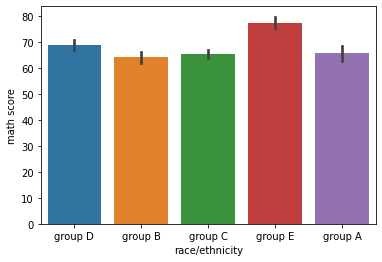

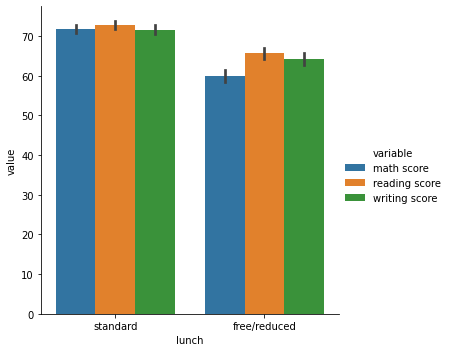

In [62]:
sns.catplot(data=df.melt(id_vars=['lunch'], value_vars=['math score', 'reading score', 'writing score']), x='lunch', y='value', hue='variable', kind='bar')

# sns.catplot(data = df, x = 'lunch', y = ['math score', 'reading score', 'writing score'], kind= 'bar', col = ['math score', 'reading score', 'writing score'])

In [4]:

df = pd.concat([df, pd.get_dummies(df['lunch'], dtype=int)], axis=1)
df.drop(['lunch'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['parental level of education'], dtype=int)], axis=1)
df.drop(['parental level of education'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['race/ethnicity'], dtype=int)], axis=1)
df.drop(['race/ethnicity'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['gender'], dtype=int)], axis=1)
df.drop(['gender'], axis=1, inplace=True)

df['test preparation course'] = df['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)


In [5]:
X=df[['test preparation course',"free/reduced", 'standard', "associate's degree",
       "bachelor's degree", 'high school', "master's degree", 'some college',
       'some high school', 'female', 'male', 'group A', 'group B', 'group C',
       'group D', 'group E']]
y = df[['math score', 'reading score', 'writing score']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [8]:
import os
os.chdir("/Users/danieldoh/Desktop/pkl_files")
# import os
# print(os.getcwd())


In [12]:


from flask import request
print(request.url)




RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.

In [14]:
from flask import Flask, request, jsonify
import pickle

# Load the trained model from a file
with open('model.pkl', 'rb') as f:
    model1 = pickle.load(f)

# Create a Flask application
app = Flask(__name__)

@app.route('/predict', methods=['POST']) 
def predict():
    # Print the URL of the current request
        
    # Get the input data from the client
    input_data = request.json
    
    print(request.url)

    # Pass the preprocessed data to the model for prediction
    prediction = model1.predict(input_data)
    
    # Return the prediction result to the client
    response = {'prediction': prediction.tolist()}
    return jsonify(response)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
